In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv("height-weight.csv")

In [44]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [45]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


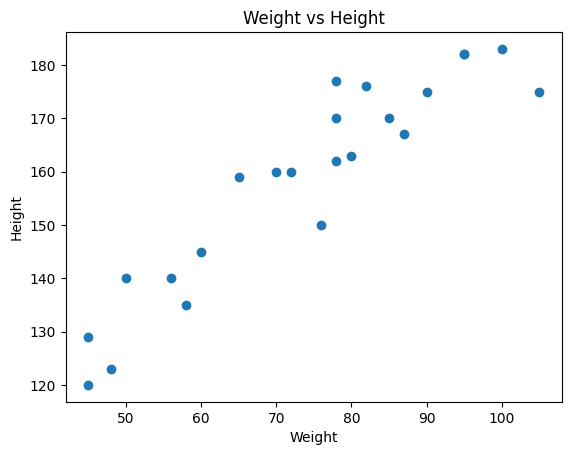

In [46]:
plt.scatter(df["Weight"],df["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Weight vs Height")
plt.show()

<Axes: >

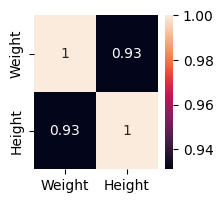

In [47]:
df.corr()
plt.figure(figsize = (2,2))
sns.heatmap(df.corr(),annot=True)

<Figure size 200x200 with 0 Axes>

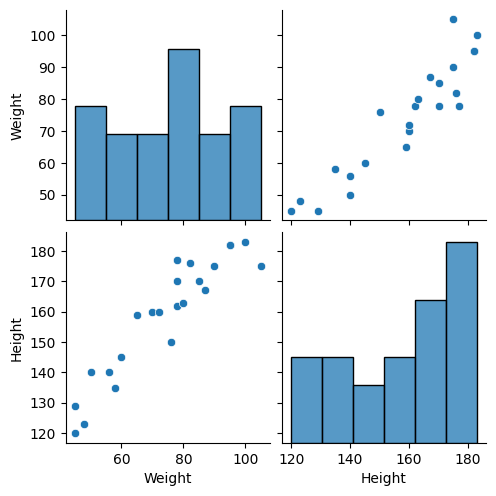

In [48]:
plt.figure(figsize = (2,2))
sns.pairplot(df)

In [49]:
# Define the independent (X) and depedent (y) variables for our regression model
# X needs to be a 2D array/dataframe (hence the double brackets)
X = df[["Weight"]]
y = df["Height"]
X.shape

(23, 1)

In [50]:
X_series = df["Weight"]
np.array(X_series)


array([ 45,  58,  48,  60,  70,  78,  80,  90,  95,  78,  82,  95, 105,
       100,  85,  78,  50,  65,  76,  87,  45,  56,  72])

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.66000053],
       [-0.82412765],
       [ 0.77873079],
       [-0.23047638],
       [ 0.48190515],
       [ 0.24444464],
       [ 1.84730308],
       [ 1.2536518 ],
       [-1.71460456],
       [ 0.3631749 ],
       [-0.9428579 ],
       [-1.71460456],
       [-0.52730201],
       [-1.06158816],
       [ 0.24444464],
       [ 1.2536518 ],
       [-0.11174612]])

In [54]:
X_test = scaler.transform(X_test)
X_test

array([[-1.41777892],
       [ 0.12571439],
       [ 1.55047744],
       [ 0.95682617],
       [-1.53650918],
       [ 0.24444464]])

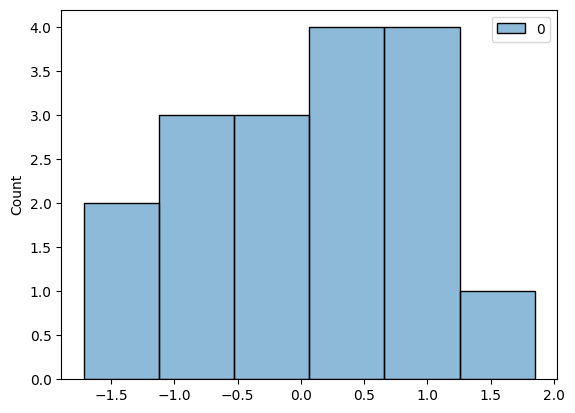

<Axes: ylabel='Count'>

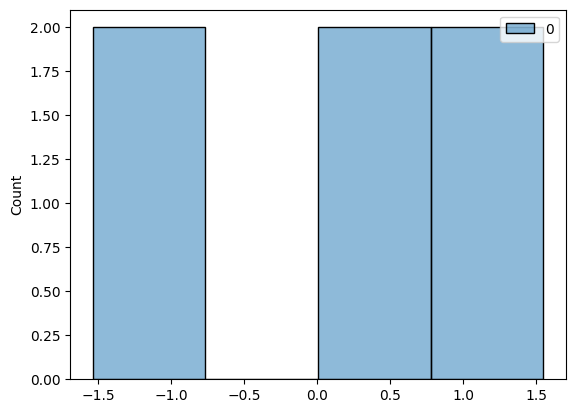

In [55]:
sns.histplot(X_train)
plt.show()
sns.histplot(X_test)

In [56]:
from sklearn.linear_model import LinearRegression

#n_jobs = -1 uses all available CPU cores for faster computation on large datasets
regression = LinearRegression(n_jobs=-1)
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [57]:
# display the model's learned parameters
print(regression.coef_)
print(regression.intercept_)

[16.82847295]
158.52941176470588


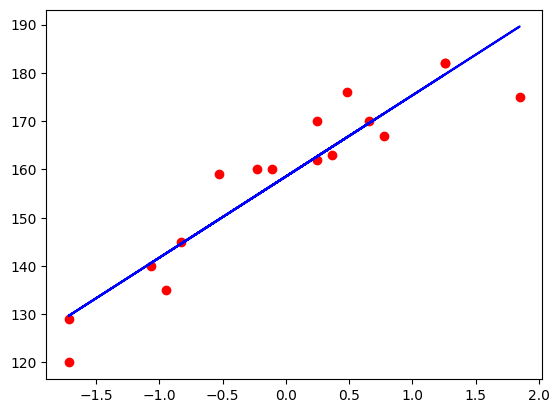

In [58]:
plt.scatter(X_train, y_train, c = "red")
plt.plot(X_train, regression.predict(X_train), color = "blue")

Prediction of y of Test data

In [59]:
y_pred = regression.predict(X_test) # predict the y of X_test
# y_pred = 158.52 + 16.82 (X_test)

In [60]:
# Import metrices to evaluate the model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [61]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("RMSE :", rmse)

Mean Squared Error: 74.0270334132929
Mean Absolute Error: 6.9990244378323
RMSE : 8.603896408796011


R2 score

In [79]:
from sklearn.metrics import r2_score
acc= r2_score(y_test, y_pred)
print(acc)

0.8462042242106104
